In [138]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
import numpy as np

from consumption_saving import *

In [140]:
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [141]:
value_function_employment(model.par, model.sol)

In [142]:
print(np.shape(model.par.V_e_t_a))
model.par.V_e_t_a[:,0]

(41, 20)


array([-2.98181154, -2.70992479, -2.43792894, -2.16799354, -1.9030688 ,
       -1.64713933, -1.40556279, -1.20030325, -1.05710547, -0.97866786,
       -0.93670366, -0.80831702, -0.68517122, -0.56614496, -0.45035891,
       -0.33898463, -0.23298267, -0.13538671, -0.05044464,  0.01587016,
        0.05509087,  0.12994781,  0.20343296,  0.27568761,  0.34655053,
        0.41526793,  0.48060216,  0.54080242,  0.59336649,  0.63466901,
        0.65936162,  0.65936162,  0.65936162,  0.65936162,  0.65936162,
        0.65936162,  0.65936162,  0.65936162,  0.65936162,  0.65936162,
        0.65936162])

In [143]:
print(np.shape(model.par.V_e))
model.par.V_e[-1,:,0]

(41, 20, 20)


array([ 0.65936162,  0.17229979, -0.26424051, -0.66230821, -1.03816003,
       -1.46095302, -1.91025444, -2.32055761, -2.65301319, -2.89238971,
       -3.02734361, -3.04240452, -3.06293129, -3.09106055, -3.12996797,
       -3.18503917, -3.26440592, -3.38075914, -3.55519849, -3.82338374])

In [144]:
V_u,s = unemployment_ss(model.par, -1,0)
print(V_u,s)

-6.143777144923046 0.5442511010841194


In [145]:
solve_search_and_consumption(model.par, model.sol)

t=40, i_a =0, V_u=-6.143777144923046, s=0.5442511010841194, c=0.0, r=0.4
t=39, i_a =0, V_u_next=-6.143777144923046, V_e_next=0.6593616186284471, V_u=-6.143777144923072, s=0.5442511010841194, c=0.21999999999999997, r=0.4, a_next=-0.9
t=38, i_a =0, V_u_next=-6.143777144923072, V_e_next=0.6593616186284471, V_u=-6.143777144923082, s=0.5442511010841216, c=0.21999999999999997, r=0.4, a_next=-0.9
t=37, i_a =0, V_u_next=-6.143777144923082, V_e_next=0.6593616186284471, V_u=-6.143777144923084, s=0.5442511010841223, c=0.21999999999999997, r=0.4, a_next=-0.9
t=36, i_a =0, V_u_next=-6.143777144923084, V_e_next=0.6593616186284471, V_u=-6.143777144923085, s=0.5442511010841226, c=0.21999999999999997, r=0.4, a_next=-0.9
t=35, i_a =0, V_u_next=-6.143777144923085, V_e_next=0.6593616186284471, V_u=-6.143777144923087, s=0.5442511010841227, c=0.21999999999999997, r=0.4, a_next=-0.9
t=34, i_a =0, V_u_next=-6.143777144923087, V_e_next=0.6593616186284471, V_u=-6.143777144923087, s=0.5442511010841228, c=0.21999

In [146]:
model.sol.s[-3,:]

array([0.5442511 , 0.5442511 , 0.5442511 , 0.5442511 , 0.53493678,
       0.49213457, 0.45898353, 0.43439929, 0.43439687, 0.43439709,
       0.43438758, 0.4258987 , 0.42359968, 0.41693074, 0.40940559,
       0.40190682, 0.39446184, 0.38715338, 0.37990537, 0.3731673 ])

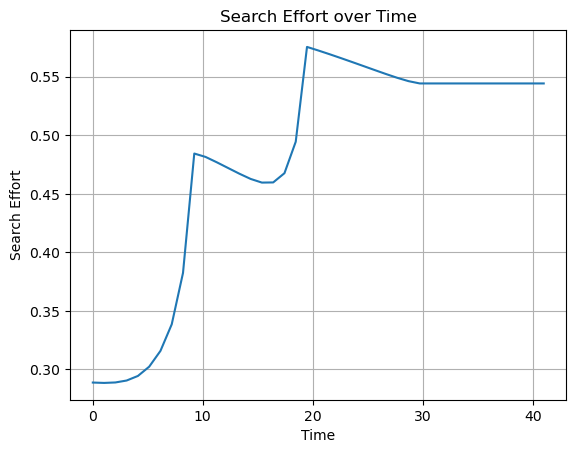

In [169]:
import matplotlib.pyplot as plt

# Assuming solve_search_effort returns a tuple where the first element is the time array and the second element is the search effort array
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sol.s[:model.par.T,0])
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()


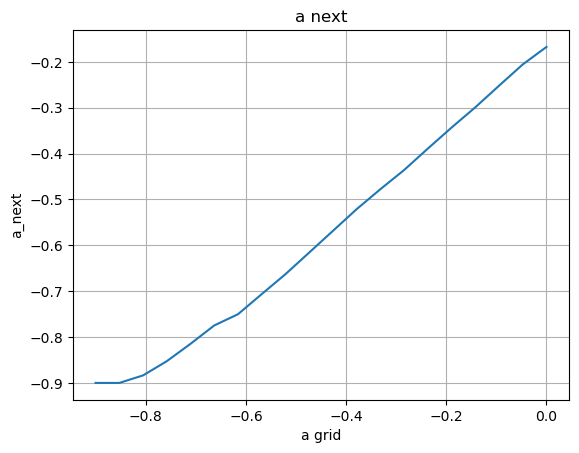

In [148]:

plt.plot(model.par.a_grid, model.sol.a_next[0,:])
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next')
plt.grid(True)
plt.show()


In [149]:
model1 = model.copy()
model1.par.L = -0.00
model1.par.a_grid = np.linspace(model1.par.L, model1.par.A_0, 20)

In [150]:
value_function_employment(model1.par, model1.sol)

In [151]:
solve_search_and_consumption(model1.par, model1.sol)

t=40, i_a =0, V_u=-1.6224936773596832, s=0.3440325555531681, c=0.0, r=0.4
t=39, i_a =0, V_u_next=-1.6224936773596832, V_e_next=2.6779132670549175, V_u=-1.6224936773596832, s=0.3440325555531681, c=0.4, r=0.4, a_next=-0.0
t=38, i_a =0, V_u_next=-1.6224936773596832, V_e_next=2.6779132670549175, V_u=-1.6224936773596832, s=0.3440325555531681, c=0.4, r=0.4, a_next=-0.0
t=37, i_a =0, V_u_next=-1.6224936773596832, V_e_next=2.6779132670549175, V_u=-1.6224936773596832, s=0.3440325555531681, c=0.4, r=0.4, a_next=-0.0
t=36, i_a =0, V_u_next=-1.6224936773596832, V_e_next=2.6779132670549175, V_u=-1.6224936773596832, s=0.3440325555531681, c=0.4, r=0.4, a_next=-0.0
t=35, i_a =0, V_u_next=-1.6224936773596832, V_e_next=2.6779132670549175, V_u=-1.6224936773596832, s=0.3440325555531681, c=0.4, r=0.4, a_next=-0.0
t=34, i_a =0, V_u_next=-1.6224936773596832, V_e_next=2.6779132670549175, V_u=-1.6224936773596832, s=0.3440325555531681, c=0.4, r=0.4, a_next=-0.0
t=33, i_a =0, V_u_next=-1.6224936773596832, V_e_ne

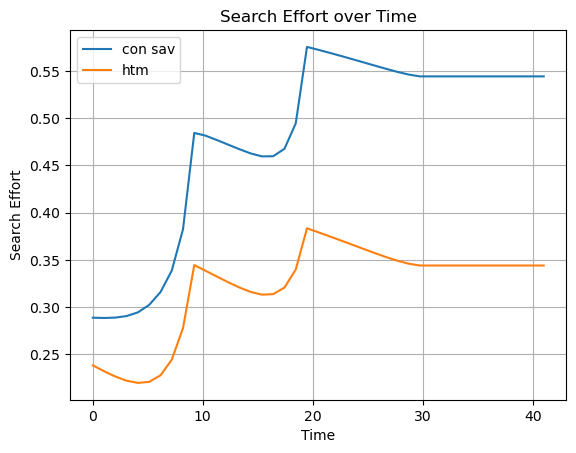

In [171]:
time = np.linspace(0, model1.par.T, model1.par.T)
plt.plot(time, model.sol.s[:model.par.T,0], label='con sav')
plt.plot(time, model1.sol.s[:model.par.T,0], label='htm')


plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()


In [172]:
solve_forward(model.par, model.sol, model.sim)

In [173]:
solve_forward(model1.par, model1.sol, model1.sim)

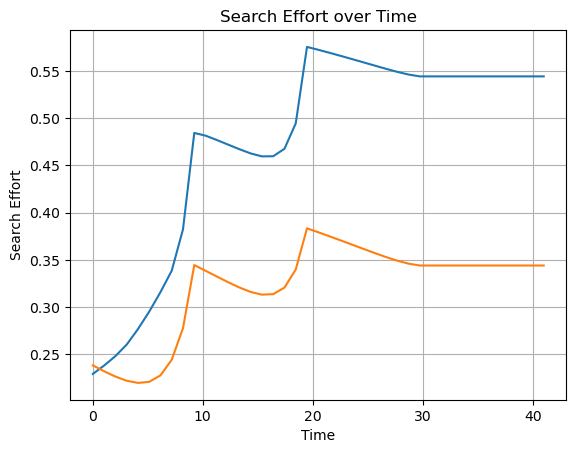

In [175]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.s[:model.par.T])
# plt.plot(time, model1.sim.s[:model.par.T])

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()


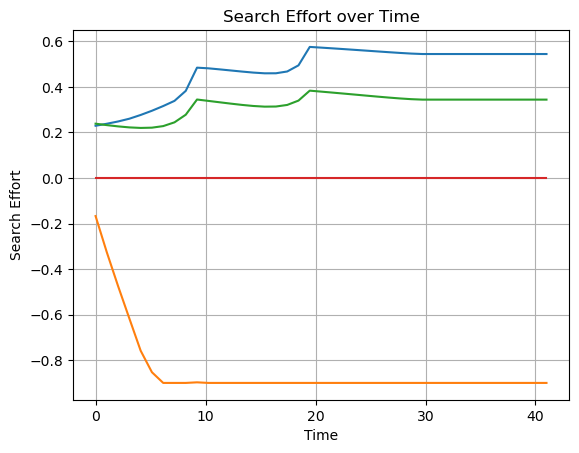

In [176]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.s)
plt.plot(time, model.sim.a_next)
# plt.plot(time, model1.sim.s)
# plt.plot(time, model1.sim.a_next)

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

In [158]:
print(model.sim.a_next)

[-0.16729278 -0.32681013 -0.4752915  -0.61739563 -0.75850767 -0.85311211
 -0.9        -0.9        -0.9        -0.89740077 -0.9        -0.9
 -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
 -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
 -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
 -0.9        -0.9        -0.9        -0.9        -0.9        -0.9
 -0.9        -0.9        -0.9        -0.9        -0.9       ]


In [159]:
solve_forward_employment(model.par, model.sol, model.sim)

-0.1672927825367524
-0.3268101256902632
-0.47529149823173655
-0.6173956336999081
-0.7585076725744107
-0.8531121147854832
-0.8999999999999999
-0.9
-0.9
-0.8974007652759258
-0.8999999999999998
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9
-0.9


In [160]:
print(model.sim.a_e[:,:])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-1.67292783e-01 -1.66368658e-01 -1.65406174e-01 -1.64403603e-01
  -1.63357873e-01 -1.62252825e-01 -1.61073570e-01 -1.59808891e-01
  -1.58236326e-01 -1.56516248e-01 -1.54826044e-01 -1.51216821e-01
  -1.45203306e-01 -1.36200898e-01 -1.23357301e-01 -1.05278786e-01
  -7.85953399e-02 -4.11290223e-02 -9.63983736e-17 -9.71445147e-17
   0.00000000e+00]
 [-3.26810126e-01 -3.26411779e-01 -3.25982916e-01 -3.25509609e-01
  -3.24981072e-01 -3.24389319e-01 -3.23304237e-01 -3.21207105e-01
  -3.17445561e-01 -3.11703776e-01 -3.02976729e-01 -2.90450479e-01
  -2.73025986e-01 -2.49125129e-01 -2.16031663e-01 -1.71873260e-01
  -1.24520187e-01 -7.28910323e-02 -5.1

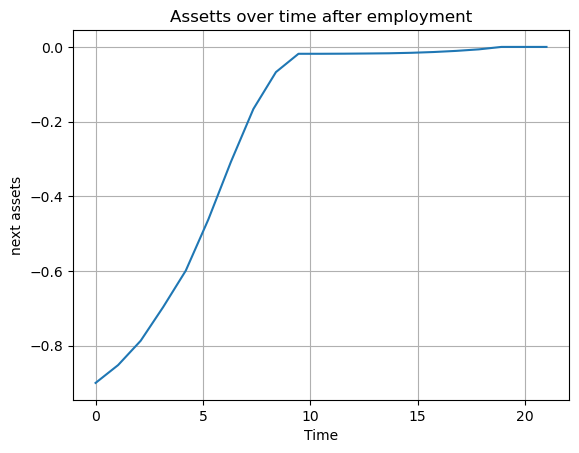

In [161]:
time = np.linspace(0, model.par.N+model.par.M+1, model.par.N+model.par.M+1)
plt.plot(time, model.sim.a_e[-1,:])


plt.xlabel('Time')
plt.ylabel('next assets')
plt.title('Assetts over time after employment')
plt.grid(True)
plt.show()